In [243]:
%matplotlib inline

In [244]:
# Import the libraries for
# mathematical computations on arrays and matrices
import numpy as np
# manipulating data via DataFrames, 2-D tabular, column-oriented data structure
import pandas as pd
# producing plots and other 2D data visualizations. Use plotly if you want interactive graphs
import matplotlib.pyplot as plt 
# statistical visualizations (a wrapper around Matplotlib)
import seaborn as sns 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

# Assign the csv data to a DataFrame
data = pd.read_csv("./Iris.csv")

# Supervised Classification Model

![](./pics-iris/Untitled Diagram.jpg)

## Part 1: Exploratory Data Analysis
### Tell me the summary of what happened

In [245]:
# Print the first 10 instances
data.head(10).style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [246]:
# Total Instances on each iris plant class
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [247]:
# Dimensions of the dataset
data.shape

(150, 6)

In [248]:
# Statistics for each feature
# No missing values (thank goodness)
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualize the data
<p> Univariate Distribution of features on species</p>

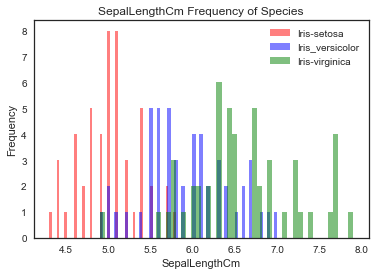

In [249]:
Iris_setosa = data[data["Species"] == "Iris-setosa"]
Iris_versicolor = data[data["Species"] == "Iris-versicolor"]
Iris_virginica = data[data["Species"] == "Iris-virginica"]

Iris_setosa["SepalLengthCm"].plot.hist(alpha=0.5,color='red',bins=50) # Setting the opacity(alpha value) & setting the bar width((bins value)
Iris_versicolor["SepalLengthCm"].plot.hist(alpha=0.5,color='blue',bins=50)
Iris_virginica["SepalLengthCm"].plot.hist(alpha=0.5,color='green',bins=50)
plt.legend(['Iris-setosa','Iris_versicolor','Iris-virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title('SepalLengthCm Frequency of Species')
plt.show()

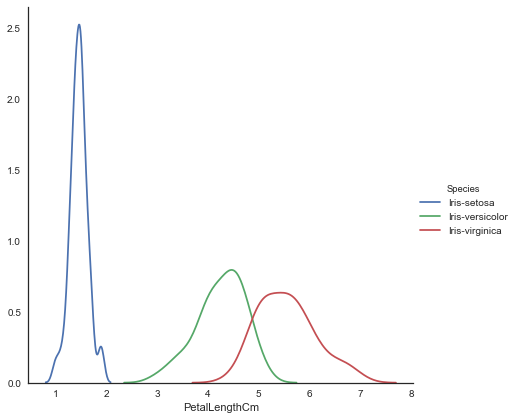

In [250]:
# Another univariate seaborn plot
# kdeplot visualizes a kernel density estimate (probability density function of PetalLength)
sns.FacetGrid(data, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

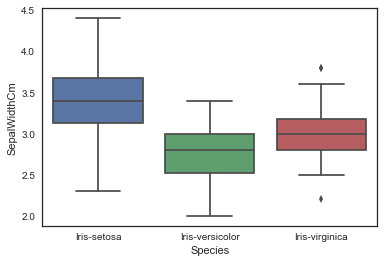

In [251]:
# Boxplot of SepalWidth
sns.boxplot(x="Species", y="SepalWidthCm", data=data)

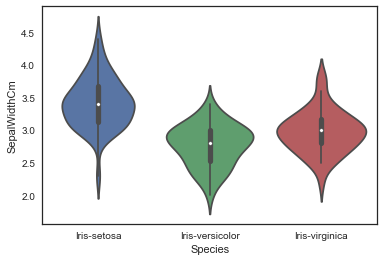

In [252]:
# A violin plot combines the benefits of boxplots and individual scatter points and aggregates them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="SepalWidthCm", data=data)

## Visualize the data
### Bivariate Distribution of features on species

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129348e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1266ed7d0>]], dtype=object)

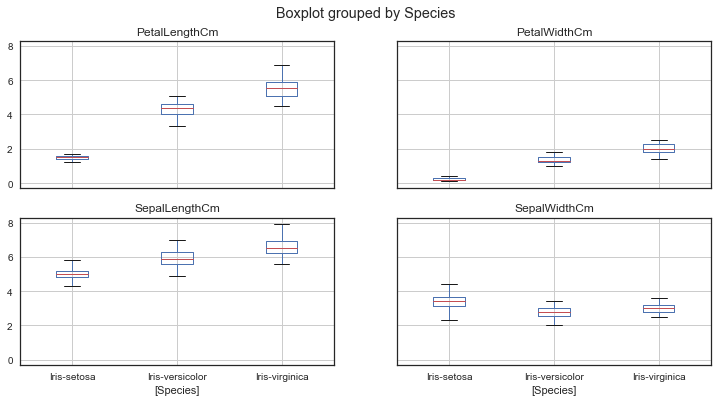

In [253]:
# A boxplot with Pandas on each feature split out by species
# .drop returns new object with labels in columns (axis=1) removed.

data.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<p> One of the clusters contains Iris setosa, while the other cluster contains both Iris virginica and Iris versicolor and is not separable without the species information. Iris virginica has bigger petal length and a slightly bigger sepal length and width </p>

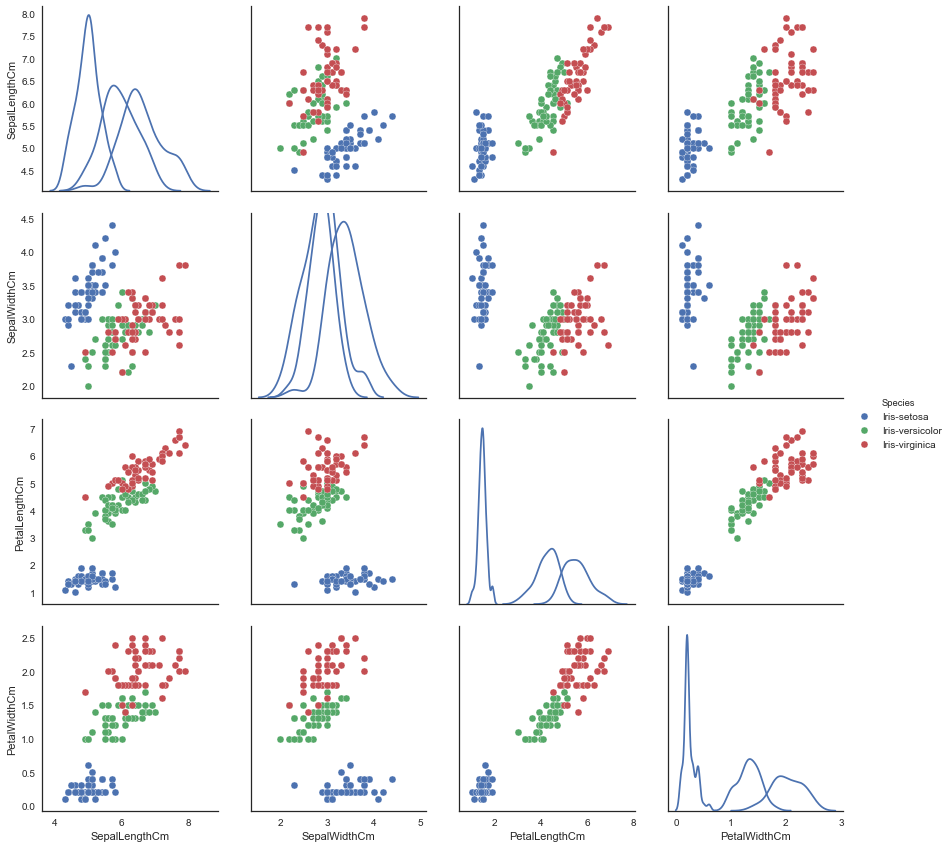

In [254]:
# Bivariate Pairwise relationships between columns
# The diagonal elements in a pairplot show the histogram by default (if diag_kind="kde" is deleted)
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

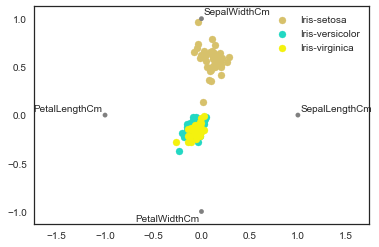

In [255]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane
from pandas.tools.plotting import radviz
radviz(data.drop("Id", axis=1), "Species")

## Part 2: Data Preprocessing
- Encoding Categorical Variables
- Mean Normalization

In [256]:
# Encoding categorical values with LabelEncoder: replaced Iris-setosa with 0, Iris-versicolor 1 and Iris-virginica 2 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
species

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


### Instead of y {0,1,2}, y would be a three dimensional vector

In [257]:
# Create dummy columns for each unique value in species to remove numerical correlations that labelencoder gave to data: 
# Iris-versicolor is not higher than Iris-setosa and Iris-setosa is not smaller than Iris-virginica
# Onehotencoder works with matrix of integers whereas getdummies works with dataframe

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"Species")

### Splitting the dataset into the Training set and Test set

In [258]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Mean Normalization (aka normal distribution, to have a faster & better classifier)

In [259]:
# Features before mean normalization
unscaled_features = X_train

# Mean Normalization (aka normal distribution, to have a faster & better classifier)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Standarize the features by having zero mean mean and scaling to unit variance
X_train_array = sc.fit_transform(X_train.values) #calculate μ & σ(fit) and apply the transformation(transform)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

In [260]:
# Center test data. Use the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

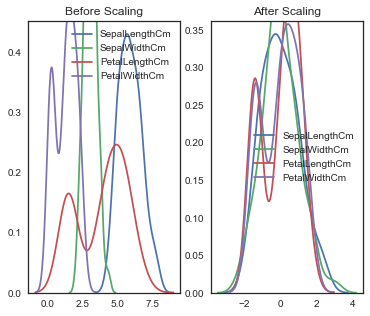

In [261]:
# Before & After Mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['SepalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['SepalWidthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalWidthCm'], ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train['SepalLengthCm'], ax=ax2)
sns.kdeplot(X_train['SepalWidthCm'], ax=ax2)
sns.kdeplot(X_train['PetalLengthCm'], ax=ax2)
sns.kdeplot(X_train['PetalWidthCm'], ax=ax2)
plt.show()

# Predicting Flower Species

Multi-class Classifier: Classify instances into one of three or more classes.
A classifier: correlates features of data with class properties
Gives the predicted classes: Softmax classifier
The cost function (how good are the parameters):Categorical Cross Entropy
Optimization algorithm finds optimal set of weights: Stochastic Gradient Descent

## Part 3: Build the model

![](pics-iris/Input-computauionunit-output.jpeg)

In [262]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)

![](./pics-iris/multilayerperceptron_network copy.png)

## Part 4: Train the model
<p>Minimize the cost function. 
Gradient Descents => Find the values of Weights that minimize the cost function. 
We need to find the change rate of the cost function(dJ) so as to select the direction that goes downhill. This would save us time because it would prevent us from searching of weights values that increase the cost.</p>

In [263]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

![](.\pics-iris/gradientDescent.gif)

## Part 5: Test the model

In [264]:
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print mlp.score(X_test,y_test)

0.966666666667


## Part 6: Just for fun, see the reults of other classifiers

In [265]:
# Check if a decision tree outputs more accurate results
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [266]:
# Test the model
tree.score(X_test,y_test) # metrics.accuracy_score is an alternative

0.96666666666666667

In [267]:
# Check if a logistic regression model outputs more accurate results
# The ‘newton-cg’ optimization algorithm supports L2 regularization
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [268]:
# Test the model
lr.score(X_test, y_test)

0.96666666666666667